## Dimensionless Analysis of Transition Boiling Using Machine Learning

We will begin this study by organising our data into a pandas dataframe. The data was collected from the EMT lab for the purpose of this analysis. Once this is done we will move on to creating a dimensionless dataframe.

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

#Preparing the data for processing

#creating dataframe for copper with nano coating
#superheat temperature
CuPdT=np.array([72.40704, 71.10017, 68.97078, 66.61751, 64.08479, 60.74023, 54.43071, 45.65994, 37.83159, 31.28086, 25.83957, 21.364, 17.69793, 14.88374, 12.66149, 10.85478, 9.529446, 8.609713, 7.790826, 7.306428, 6.665404, 6.195496, 5.902143, 5.638786])
#heat flux
Cuq=np.array([6.6269, 8.4672, 10.02, 11.579, 13.376, 17.513, 28.068, 41.091, 46.072, 47.085, 42.897, 36.914, 30.965, 23.28, 17.433, 12.823, 9.447, 7.042, 5.352, 4.182, 3.344, 2.773, 2.258, 1.862])

CuP={'dT': CuPdT.tolist(),
     'q': Cuq.tolist()}

dfCuP=pd.DataFrame(CuP, columns=['q','dT'])


#creating dataframe for copper with nano coating
#superheat temperature
CuNdT=np.array([59.62617107, 55.64625709, 49.25617399, 42.25567956, 35.95063683, 30.64195807, 26.30468767, 22.5830269, 19.63947259, 17.20142809, 15.30240145, 13.47199512, 12.01536863, 10.81286203, 9.706640891, 8.889856847, 8.168731217, 7.618664801, 7.172672996, 6.663560068, 6.205403771, 5.866599029, 5.594729712, 5.317489446, 5.099367698])
#heat flux
CuNq=np.array([6.032, 20.009, 44.71, 66.505, 77.331, 78.535, 74.93, 66.786, 56.826, 47.898, 39.346, 32.231, 26.624, 22.275, 18.516, 15.945, 13.782, 11.645, 10.174, 8.325, 7.372, 6.3, 5.36, 4.951, 4.219])

CuN={'dT': CuNdT.tolist(),
     'q': CuNq.tolist()}
    
dfCuN=pd.DataFrame(CuN, columns=['q','dT'])

#creating dataframe for plane Aluminum
#superheat temperature
AlPdT=np.array([59.26537, 55.48475, 51.17239, 46.5946, 41.85994, 37.19834, 32.95427, 28.94159, 25.18407, 21.88755, 19.0159, 16.50307, 14.50592, 12.65392, 11.1548, 9.814904, 8.751415, 7.868639, 7.121047, 6.542312, 6.023217])
#Heat flux
Alq=np.array([22.20092, 38.55384, 45.88544, 47.17718, 45.38837, 42.6716, 39.1973, 36.12405, 33.18834, 30.1666, 26.93744, 22.94232, 19.48176, 16.54108, 14.03877, 12.18961, 10.30799, 8.830249, 7.522769, 6.447961, 5.512758])

AlP={'dT': AlPdT.tolist(),
     'q': Alq.tolist()}

dfAlP=pd.DataFrame(AlP, columns=['q','dT'])

#creating dataframe for Aluminum with nano coating
#superheat temperature
AlNdT=np.array([64.5774882, 56.7100587, 48.6706631, 41.5980008, 35.5826658, 30.5508967, 26.6204239, 23.4450393, 20.8737279, 18.749954, 16.951414, 15.4714771, 14.2563868, 13.2151452, 12.3045772, 11.5336639, 10.8288597, 10.2194144, 9.68749447, 9.2075748, 8.79153423, 8.40384187])
#heat flux
AlNq=np.array([20.9809233, 57.6925765, 71.5818239, 67.54756, 59.9970482, 50.5416674, 41.0311739, 33.9732047, 27.6191982, 22.7323589, 18.8425034, 15.6918866, 13.0517787, 11.1406004, 9.656973, 8.10700753, 7.32281073, 6.13342328, 5.41011967, 4.85147497, 4.29891155, 3.8000111])

AlN={'dT': AlNdT.tolist(),
     'q': AlNq.tolist()}

dfAlN=pd.DataFrame(AlN, columns=['q','dT'])

Since we have added all our measured data from the lab into a data frame, we will proceed to add the material properties of each substrate.

In [4]:
# assigning k values

dfCuP['k']=[490 for n in range(len(dfCuP))]
dfCuN['k']=[490 for n in range(len(dfCuN))]
dfAlP['k']=[147 for n in range(len(dfAlP))]
dfAlN['k']=[147 for n in range(len(dfAlN))]

# assigning n1 values

dfCuP['n1']=[0.01128 for n in range(len(dfCuP))]
dfCuN['n1']=[0.11039 for n in range(len(dfCuN))]
dfAlP['n1']=[0.3376 for n in range(len(dfAlP))]
dfAlN['n1']=[0.02647 for n in range(len(dfAlN))]

# assigning n2 values

dfCuP['n2']=[2.984 for n in range(len(dfCuP))]
dfCuN['n2']=[2.2767 for n in range(len(dfCuN))]
dfAlP['n2']=[1.570 for n in range(len(dfAlP))]
dfAlN['n2']=[2.3429 for n in range(len(dfAlN))]

# assigning theta values

dfCuP['theta']=[47 for n in range(len(dfCuP))]
dfCuN['theta']=[7 for n in range(len(dfCuN))]
dfAlP['theta']=[45 for n in range(len(dfAlP))]
dfAlN['theta']=[8 for n in range(len(dfAlN))]

# assigning n1xdT^n2

dfCuP['q_']=[dfCuP['n1'][n]*dfCuP['dT'][n]**dfCuP['n2'][n] for n in range(len(dfCuP))]
dfCuN['q_']=[dfCuN['n1'][n]*dfCuN['dT'][n]**dfCuN['n2'][n] for n in range(len(dfCuN))]
dfAlP['q_']=[dfAlP['n1'][n]*dfAlP['dT'][n]**dfAlP['n2'][n] for n in range(len(dfAlP))]
dfAlN['q_']=[dfAlN['n1'][n]*dfAlN['dT'][n]**dfAlN['n2'][n] for n in range(len(dfAlN))]

# assigning gamma = q/n1xdT^n2

dfCuP['alpha']=[dfCuP['q'][n]/dfCuP['q_'][n] for n in range(len(dfCuP))]
dfCuN['alpha']=[dfCuN['q'][n]/dfCuN['q_'][n] for n in range(len(dfCuN))]
dfAlP['alpha']=[dfAlP['q'][n]/dfAlP['q_'][n] for n in range(len(dfAlP))]
dfAlN['alpha']=[dfAlN['q'][n]/dfAlN['q_'][n] for n in range(len(dfAlN))]

#combining all the data to one dataframe

Data=[dfCuP, dfCuN, dfAlP, dfAlN]
DF=pd.concat(Data, ignore_index=True, )
#DF=DF.sort_values(by='dT')
DF

,q,dT,k,n1,n2,theta,q_,alpha
0,6.626900,72.407040,490,0.01128,2.9840,47,3998.480557,0.001657
1,8.467200,71.100170,490,0.01128,2.9840,47,3786.963217,0.002236
2,10.020000,68.970780,490,0.01128,2.9840,47,3458.484790,0.002897
3,11.579000,66.617510,490,0.01128,2.9840,47,3118.149062,0.003713
4,13.376000,64.084790,490,0.01128,2.9840,47,2777.575781,0.004816
...,...,...,...,...,...,...,...,...
87,6.133423,10.219414,147,0.02647,2.3429,8,6.133920,0.999919
88,5.410120,9.687494,147,0.02647,2.3429,8,5.411888,0.999673
89,4.851475,9.207575,147,0.02647,2.3429,8,4.804518,1.009773
90,4.298912,8.791534,147,0.02647,2.3429,8,4.311249,0.997138


Our dataframe is complete. From this dataframe, we will create a dimensionless. This dimensionless data frame will be used to study the transition boiling.

In [92]:
#k and theta have already been evaluated
#let us determine Q_s, Ja_s, Pr_l

mhu = 2.78*10**(-4)
h = 2257
sig = 0.0589
g_en = 9.8
rho_l = 958
rho_v = 0.597
c_p = 4.22
Pr = 1.72

DF['Q_s']=[10*(DF['q'][n]/(mhu*h))*np.sqrt(sig/(g_en*(rho_l-rho_v))) for n in range(len(DF))]

DF['Ja_s']=[100*c_p*DF['dT'][n]/h for n in range(len(DF))]

DF['Pr_l']=[1.72 for n in range(len(DF))]
            
DF

,q,dT,k,n1,n2,theta,q_,alpha,Q_s,Ja_s,Pr_l,n1hat,n2hat,n5hat
0,6.626900,72.407040,490,0.01128,2.9840,47,3998.480557,0.001657,0.264625,13.538224,1.72,2.2,0.5446,0.00693
1,8.467200,71.100170,490,0.01128,2.9840,47,3786.963217,0.002236,0.338112,13.293873,1.72,2.2,0.5446,0.00693
2,10.020000,68.970780,490,0.01128,2.9840,47,3458.484790,0.002897,0.400118,12.895733,1.72,2.2,0.5446,0.00693
3,11.579000,66.617510,490,0.01128,2.9840,47,3118.149062,0.003713,0.462372,12.455733,1.72,2.2,0.5446,0.00693
4,13.376000,64.084790,490,0.01128,2.9840,47,2777.575781,0.004816,0.534130,11.982180,1.72,2.2,0.5446,0.00693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,6.133423,10.219414,147,0.02647,2.3429,8,6.133920,0.999919,0.244920,1.910763,1.72,2.2,0.5446,0.00693
88,5.410120,9.687494,147,0.02647,2.3429,8,5.411888,0.999673,0.216037,1.811308,1.72,2.2,0.5446,0.00693
89,4.851475,9.207575,147,0.02647,2.3429,8,4.804518,1.009773,0.193729,1.721576,1.72,2.2,0.5446,0.00693
90,4.298912,8.791534,147,0.02647,2.3429,8,4.311249,0.997138,0.171664,1.643787,1.72,2.2,0.5446,0.00693


We now have our complete data set with dimensionless data. Let us now process these dimensionless data using a genetic algorithm in the low superheat region. The goal here is to obtain the constants of an equation of the form 
$$Q_s = \hat{n}_1Ja_s^{\hat{n}_2}Pr_l^{-\hat{n}_5}$$
$$\implies lnQ_s = ln(\hat{n}_1) + \hat{n}_2ln(Ja_s) - n_5ln(Pr_l)$$
$$\therefore, f_{err} = -lnQ + ln(\hat{n}_1) + \hat{n}_2ln(Ja_s) - n_5ln(Pr_l)$$

Let us select the dataframe where $\Delta T_{sat}<13^\circ C$ then segment it for the different substrate

In [93]:
DF_low=DF[DF['dT']<13]

#we can segment and reset the index for each data frame using their n1 values
DF_CuP=DF_low[DF_low['n1']==0.01128]
DF_CuP=DF_CuP.reset_index()

DF_CuN=DF_low[DF_low['n1']==0.11039]
DF_CuN=DF_CuN.reset_index()

DF_AlP=DF_low[DF_low['n1']==0.3376]
DF_AlP=DF_AlP.reset_index()

DF_AlN=DF_low[DF_low['n1']==0.02647]
DF_AlN=DF_AlN.reset_index()

## Let us analyze DF_CuP and evaluate its n1hat

In [94]:
DF_CuP

,index,q,dT,k,n1,n2,theta,q_,alpha,Q_s,Ja_s,Pr_l,n1hat,n2hat,n5hat
0,14,17.433,12.661490,490,0.01128,2.984,47,21.984864,0.792955,0.696134,2.367368,1.72,2.2,0.5446,0.00693
1,15,12.823,10.854780,490,0.01128,2.984,47,13.886802,0.923395,0.512048,2.029560,1.72,2.2,0.5446,0.00693
2,16,9.447,9.529446,490,0.01128,2.984,47,9.415578,1.003337,0.377237,1.781757,1.72,2.2,0.5446,0.00693
3,17,7.042,8.609713,490,0.01128,2.984,47,6.955291,1.012467,0.281201,1.609791,1.72,2.2,0.5446,0.00693
4,18,5.352,7.790826,490,0.01128,2.984,47,5.161718,1.036864,0.213716,1.456681,1.72,2.2,0.5446,0.00693
5,19,4.182,7.306428,490,0.01128,2.984,47,4.261919,0.981248,0.166996,1.366111,1.72,2.2,0.5446,0.00693
6,20,3.344,6.665404,490,0.01128,2.984,47,3.240465,1.031951,0.133533,1.246256,1.72,2.2,0.5446,0.00693
7,21,2.773,6.195496,490,0.01128,2.984,47,2.605338,1.064353,0.110731,1.158396,1.72,2.2,0.5446,0.00693
8,22,2.258,5.902143,490,0.01128,2.984,47,2.254250,1.001663,0.090166,1.103546,1.72,2.2,0.5446,0.00693
9,23,1.862,5.638786,490,0.01128,2.984,47,1.967193,0.946526,0.074353,1.054306,1.72,2.2,0.5446,0.00693


<ipython-input-152-1d064099b604>:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lnq['Q_s'][i]=np.log(DF_CuP['Q_s'][i]+0.000000000010)


ENDING:     avg w1-w5,acostmean: 0.0701353720759409 2.214717211121269 0.011920830018499211 0.28799606566161573
MINUMUM:    min w1-w5,acostmean: 0.07654369685474804 2.570801762774431 0.013577276229732323 0.04682823450359494
TIME AVG:  timeavg w1-w5,acostmean: 0.07122869142858262 2.2254466806978277 0.012127356627838214 0.2598041353874065


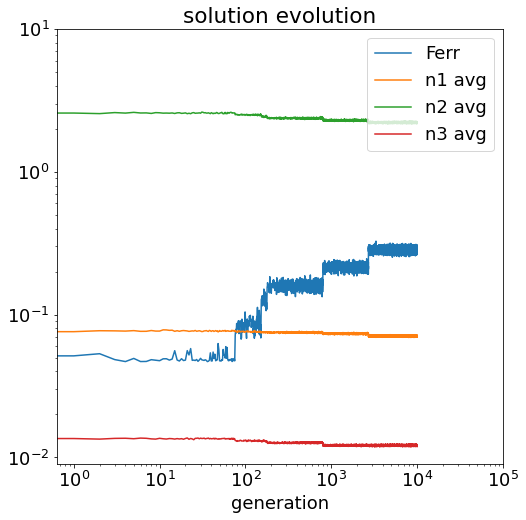

superheat (K), Q_s_data, Q_s_pred, percentdif:
72.40704 0.6961342355954646 0.4816227646821225 -30.81467049668253
71.10017 0.5120478003235612 0.34190480611422414 -33.22795139473782
68.97078 0.37723743037172913 0.2558872758190861 -32.16811079246956
66.61751 0.2812010145736971 0.20415182848547245 -27.40003844048423
64.08479 0.21371596563453946 0.16343963472244732 -23.52483622962738
60.74023 0.16699554713819958 0.1416822676550861 -15.158056557139883
54.43071 0.13353254653996638 0.11549620965211273 -13.507071762804557
45.65994 0.11073138503448766 0.09815420650845723 -11.35827798244665
37.83159 0.09016641449977393 0.08811033864425172 -2.2803123168742263
31.28086 0.07435334977793583 0.07959932042171651 7.0554597196337925
meanAbspdifA =  8.93158116785912


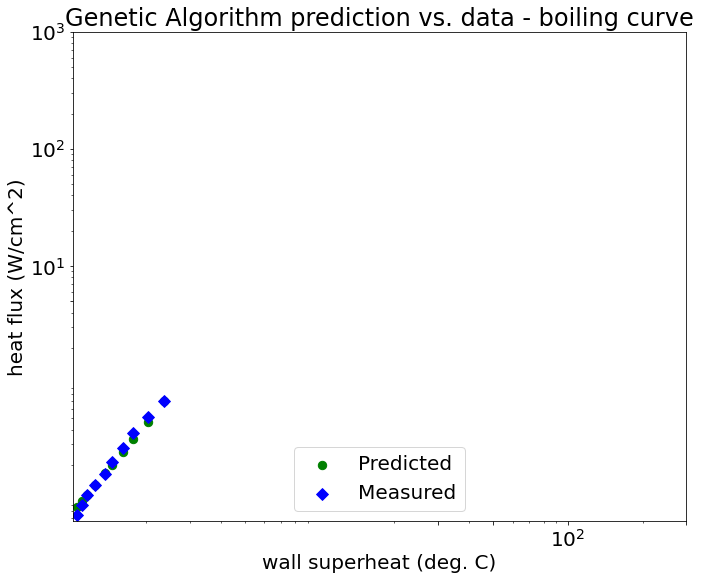

In [152]:
    # >>>>> ProtoGeneticSImBcurve_toUrsan -  HIGH SUPERHEAT
    #V.P. Carey 9/15/20
    #U. Tchouteng Njike 03/08/2021

    #import math and numpy packages
import math
import numpy 

%matplotlib inline
# importing the required module 
import matplotlib.pyplot as plt 
plt.rcParams['figure.figsize'] = [8, 8] # for square canvas


#import copy
from copy import copy, deepcopy
# version 3 print function
from __future__ import print_function
# seed the pseudorandom number generator
from random import seed
from random import random
# seed random number generator
seed(1)


    #INITIALIZE VARIABLES
    ydata = []
    lydata = []
    w = []
    wtemp = []
    gen=[0]

    w1avg = [0.0]
    w2avg = [0.0]
    w5avg = [0.0]

    meanAcost=[0.0]
    acostmeanavgw=[0.0] 
    ND = len(DF_CuP)      #number of data vectors in array
    DI = 3        #number of data items in vector
    NS = len(DF_CuP)       #total number of DNA strands
    NGEN = 10000      #number of generations (steps)
    MFRAC = 0.6
    #here the number of data vectors equal the number if DNA strands (organisms)
    # they can be different if they are randomly paired to compute cost (survivability) function
    for k in range(NGEN-1):
        gen.append(k+1)   # generation array
        meanAcost.append(0.0)
        acostmeanavgw.append(0.0)

        w1avg.append(0.0)
        w2avg.append(0.0)
        w5avg.append(0.0)

    #Set constants in postulated fit relation
    m1=4
    m2=13

    # DNA paramters initial guesses
    w0i =  -1

    w1i =  0.07668253439663711                                                                                                                                                   
    w2i =  2.571553629403484
    w5i =  0.013458063757725996 

    #print data to confirm
    #print ('data =', DF_low)

    #initialize lydata to have same margtic form as roriginal data above
    #need deepcopy since this array is a list(rows) of lists (column entries)
    lnq = deepcopy(DF_CuP)

    #now store log values for data
    for i in range(ND):
        lnq['Q_s'][i]=np.log(DF_CuP['Q_s'][i]+0.000000000010)


    #OK now have stored array of log values for data
    #Next - create array of DNA strands w[i] and wtemp[i] with dimesnion NS = 5

    #store array where rows are dna vectors 
    w =  [[-1., w1i+0.0001*random(), w2i+0.0001*random(), w3i+0.0001*random(), w4i+0.0001*random(), w5i+0.0001*random()]]
    for i in range(ND):
        w.append([-1., w1i+0.0001*random(), w2i+0.0001*random(), w3i+0.0001*random(), w4i+0.0001*random(), w5i+0.0001*random()])

    # store also in wtemp
    wtemp = deepcopy(w)

    #initialize cost values
    cost =  [[0.0]]
    costavgw =  [[0.0]]
    acost =  [[0.0]]
    acostavgw =  [[0.0]]
    vcost =  [[0.0]]
    avcost =  [[0.0]]

    for i in range(ND-1):
        cost.append([0.0])
        acost.append([0.0])
        costavgw.append([0.0])
        acostavgw.append([0.0])
        vcost.append([0.0])
        avcost.append([0.0])

    acostmeanavgwMin=1000000000.0 

    w1min = 0.0
    w2min = 0.0
    w5min = 0.0

    acostta = 0.0

    w1ta = 0.0
    w2ta = 0.0
    w5ta = 0.0

    trat = 0.0

    #start of evolution loop, number of generations = NGEN
    # ----------------------
    for k in range(NGEN):

        #calculate costs
        for i in range(ND):
            cost[i] = w[i][0]*lnq['Q_s'][i] + math.log(w[i][1]) + w[i][2]*DF_CuP['Ja_s'][i] - w[i][5]*math.log(DF_CuP['Pr_l'][i]) 
            #trat = (w[i][2]*(DF['dT'][i]*DF['k'][i]**w[i][4]*DF['theta'][i]**w[i][5]/w[i][1])**m1) + ((DF['dT'][i]*DF['k'][i]**w[i][4]*DF['theta'][i]**w[i][5]/w[i][1])**m2)
            #cost[i] = -math.log(DF['alpha'][i]) -w[i][3]*math.log(1.00000001 + trat)

            acost[i] = abs(cost[i])/abs(lnq['Q_s'][i])
        #-------------
        acostmean = numpy.mean(acost)
        acostmedian = numpy.median(acost)

    #pick survivors 
        clim = MFRAC*acostmedian  #cut off limit is a fraction MFRAC of median value for population
        nkeep = 0

        for j in range(NS):  # NS cost values, one for each strand
            #print('acost,clim=', acost[j],clim)
            if (acost[j] < clim):
                nkeep = nkeep + 1
                #wtemp[nkeep][0] = w[j][0];

                wtemp[nkeep-1][1] = w[j][1];
                wtemp[nkeep-1][2] = w[j][2];
                wtemp[nkeep-1][5] = w[j][5];

        # uncomment to print number kept this generation
        #print('nkeep=', nkeep)

        #now have survivors in leading entries in list of vectors from 1 to nkeep

        #compute number to be added by mating
        nnew = NS - nkeep  
        for j in range(nnew): 
            # pick two survivors randomly
            nmate1 = numpy.random.randint(low=0, high=nkeep+1)
            nmate2 = numpy.random.randint(low=0, high=nkeep+1)

            #then randomly pick DNA from parents for offspring

            # here, do not change property 0, it's just the -1 multiplier
            #if (numpy.random.rand() < 0.5)
            #    wtemp[nkeep+j+1][0] = w[nmate1][0]  % property 0
            #else
            #    wtemp[nkeep+j+1][0] = w[nmate2][0]


            if (numpy.random.rand() < 0.5):
                wtemp[nkeep+j+1][1] = w[nmate1][1]*(1.+0.04*2.*(0.5-numpy.random.rand()))  # property 3, mutation added
            else:
                wtemp[nkeep+j+1][1] = w[nmate2][1]*(1.+0.04*2.*(0.5-numpy.random.rand()))

            if (numpy.random.rand() < 0.5):
                wtemp[nkeep+j+1][2] = w[nmate1][2]*(1.+0.04*2.*(0.5-numpy.random.rand()))  # property 4, mutation added
            else:
                wtemp[nkeep+j+1][2] = w[nmate2][2]*(1.+0.04*2.*(0.5-numpy.random.rand()))
                
            if (numpy.random.rand() < 0.5):
                wtemp[nkeep+j+1][5] = w[nmate1][5]*(1.+0.04*2.*(0.5-numpy.random.rand()))  # property 5, mutation added
            else:
                wtemp[nkeep+j+1][5] = w[nmate2][5]*(1.+0.04*2.*(0.5-numpy.random.rand()))

        # set w = wtemp
        w = deepcopy(wtemp)


        w1avg[k] = 0.0;
        w2avg[k] = 0.0;
        w5avg[k] = 0.0;


        for j in range(NS):  # NS cost values, one for each strand    
            w1avg[k] = w1avg[k] + w[j][1]/NS;
            w2avg[k] = w2avg[k] + w[j][2]/NS;
            w5avg[k] = w5avg[k] + w[j][5]/NS;


        #gen[k]=k
        meanAcost[k]=acostmean

        #calculate costs for averaged DNA values
        for i in range(ND):  

            costavgw[i] = -1.*lnq['Q_s'][i] + math.log(w1avg[k]) + w2avg[k]*math.log(DF_CuP['Ja_s'][i]) - w5avg[k]*math.log(DF_CuP['Pr_l'][i])
            #trat = (w2avg[k]*(DF['dT'][i]*DF['k'][i]**w4avg[k]*DF['theta'][i]**w5avg[k]/w3avg[k])**m1) + ((DF['dT'][i]*DF['k'][i]**w4avg[k]*DF['theta'][i]**w5avg[k]/w1avg[k])**m2)
            #costavgw[i] = -math.log(DF['Q_s'][i]) -w3avg[k]*math.log(1.00000001 + trat)

            acostavgw[i] = abs(costavgw[i])/abs(lnq['Q_s'][i])

        #-------------

        acostmeanavgw[k] = numpy.mean(acostavgw)

        if (acostmeanavgw[k] < acostmeanavgwMin):
            acostmeanavgwMin = acostmeanavgw[k] 
            w1min = w1avg[k]
            w2min = w2avg[k]
            w5min = w5avg[k]

        acostta = acostta + acostmeanavgw[k]/NGEN
        if (k > 800):
            w1ta = w1ta + w1avg[k]/(NGEN-800)
            w2ta = w2ta + w2avg[k]/(NGEN-800)
            w5ta = w5ta + w5avg[k]/(NGEN-800)

        #print('avg w1-w5:', w1avg[k], w2avg[k], w3avg[k], w4avg[k], w5avg[k], acostmeanavgw[k])
        kvalue = k

        #end of evolution loop
        # ----------------------
        # ----------------------

    #final print and plot of results
    print('ENDING:     avg w1-w5,acostmean:', w1avg[k], w2avg[k], w5avg[k], acostmeanavgw[k])
    print('MINUMUM:    min w1-w5,acostmean:', w1min, w2min, w5min, acostmeanavgwMin)
    print('TIME AVG:  timeavg w1-w5,acostmean:', w1ta, w2ta, w5ta, acostta)

#plotting n3, n4, n5, n6, and Ferr from the genetic algorithme
    plt.rcParams.update({'font.size': 18})
    #plt.plot(gen, meanAcost) 
    plt.plot(gen, acostmeanavgw)
    plt.plot(gen, w1avg)
    plt.plot(gen, w2avg)
    plt.plot(gen, w5avg)

    #plt.rcParams.update({'font.size': 12})
    plt.legend(['Ferr', 'n1 avg', 'n2 avg', 'n3 avg', 'n4 avg', 'n5 avg'], loc='upper right')
    # naming the x axis 
    plt.xlabel('generation') 
    plt.loglog()
    plt.yticks([0.01,0.1,1.0,10])
    plt.xticks([1,10,100,1000,10000,100000])

    # uncomment next line to give a title to the graph 
    plt.title('solution evolution') 
    # function to show the plot 
    plt.show()   #TO HERE ***********************

    #initialize values
    QpredA =  [[0.0]]
    QpredM =  [[0.0]]
    QdataA =  [[0.0]]
    pdifA = [[0.0]]
    shData = [[0.0]]
    for i in range(0,ND-1):
        QpredA.append([0.0])
        QdataA.append([0.0])
        QpredM.append([0.0])
        pdifA.append([0.0]) 
        shData.append([0.0])

    #calculate predicted dimensionless values
    print('superheat (K), Q_s_data, Q_s_pred, percentdif:')
    meanAbspdifA = 0.0
    for i in range(0, ND):
        #trat = 1.0 + (w4ta*(DF['dT'][i]*DF['k'][i]**w6ta*DF['theta'][i]**w7ta/w3ta)**m1) + ((DF['dT'][i]*DF['k'][i]**w6ta*DF['theta'][i]**w7ta/w3ta)**m2)
        QpredA[i] = w1ta*DF_CuP['Ja_s'][i]**w2ta*DF_CuP['Pr_l'][i]**(-w5ta)
        
        #trat = 1.0 + (w4min*(DF['dT'][i]*DF['k'][i]**w6min*DF['theta'][i]**w7min/w3min)**m1) + ((DF['dT'][i]*DF['k'][i]**w6min*DF['theta'][i]**w7min/w3min)**m2)
        QpredM[i] = w1min*DF_CuP['Ja_s'][i]**w2min*DF_CuP['Pr_l'][i]**(-w5min)
        QdataA[i] = DF_CuP['Q_s'][i]
        shData[i] = DF_CuP['Ja_s'][i]
        pdifA[i] = 100.*(QpredA[i]-QdataA[i])/QdataA[i]
        print(DF['dT'][i],DF_CuP['Q_s'][i], QpredA[i], pdifA[i])
        meanAbspdifA = meanAbspdifA + abs(pdifA[i]/22.)
    print ('meanAbspdifA = ', meanAbspdifA)

    plt.rcParams.update({'font.size': 20})
    plt.figure(figsize=(11,9))
    #plt.scatter(shData, qpppredA, s=70, color='red')
    plt.scatter(shData, QpredM, s=70, color='green')
    plt.scatter(shData, QdataA, s=70, color='blue', marker='D')
    plt.legend(['Predicted','Measured'],loc='lower center')
    plt.title('Genetic Algorithm prediction vs. data - boiling curve')
    plt.xlabel('wall superheat (deg. C)')
    plt.ylabel('heat flux (W/cm^2)')
    plt.loglog()
    plt.yticks([5.,10.,100.,1000.])
    plt.xticks([30.,50.,100.,300.])
    plt.show()

Now that we have optimized values for the $\hat{n}_1, \hat{n}_2, and \space \hat{n}_5$ constants, Let us add them to our dataframe

In [59]:
DF['n1hat']=[2.15 for n in range(len(DF))]

DF['n2hat']=[0.516 for n in range(len(DF))]

DF['n5hat']=[0.00737 for n in range(len(DF))]

### Determining the constants n3, n4, n6, and n7

In [ ]:
    # >>>>> ProtoGeneticSImBcurve_toUrsan -  HIGH SUPERHEAT
    #V.P. Carey 9/15/20
    #U. Tchouteng Njike 03/08/2021

    #import math and numpy packages
import math
import numpy 

%matplotlib inline
# importing the required module 
import matplotlib.pyplot as plt 
plt.rcParams['figure.figsize'] = [8, 8] # for square canvas


#import copy
from copy import copy, deepcopy
# version 3 print function
from __future__ import print_function
# seed the pseudorandom number generator
from random import seed
from random import random
# seed random number generator
seed(1)


    #INITIALIZE VARIABLES
    ydata = []
    lydata = []
    w = []
    wtemp = []
    gen=[0]

    w3avg = [0.0]
    w4avg = [0.0]
    w6avg = [0.0]
    w7avg = [0.0]

    meanAcost=[0.0]
    acostmeanavgw=[0.0] 
    ND = len(DF)      #number of data vectors in array
    DI = 3        #number of data items in vector
    NS = len(DF)       #total number of DNA strands
    NGEN = 10000      #number of generations (steps)
    MFRAC = 0.6
    #here the number of data vectors equal the number if DNA strands (organisms)
    # they can be different if they are randomly paired to compute cost (survivability) function
    for k in range(NGEN-1):
        gen.append(k+1)   # generation array
        meanAcost.append(0.0)
        acostmeanavgw.append(0.0)

        w1avg.append(0.0)
        w2avg.append(0.0)
        w5avg.append(0.0)

    #Set constants in postulated fit relation
    m1=4
    m2=13

    # DNA paramters initial guesses
    w0i =  -1

    w3i =  2.2789306345356324                        
    w4i =  0.5265569167984457
    w6i =  0.00714621159233317
    w7i =  0.00714621159233317

    #print data to confirm
    #print ('data =', DF_low)

    #initialize lydata to have same margtic form as roriginal data above
    #need deepcopy since this array is a list(rows) of lists (column entries)
    lnq = deepcopy(DF)

    #now store log values for data
    for i in range(ND):
        lnq['Q_s'][i]=np.log(DF_low['Q_s'][i]+0.000000000010)


    #OK now have stored array of log values for data
    #Next - create array of DNA strands w[i] and wtemp[i] with dimesnion NS = 5

    #store array where rows are dna vectors 
    w =  [[-1., w1i+0.0001*random(), w2i+0.0001*random(), w3i+0.0001*random(), w4i+0.0001*random(), w5i+0.0001*random(), w6i+0.0001*random(), w7i+0.0001*random()]]
    for i in range(ND):
        w.append([-1., w1i+0.0001*random(), w2i+0.0001*random(), w3i+0.0001*random(), w4i+0.0001*random(), w5i+0.0001*random(), w6i+0.0001*random(), w7i+0.0001*random()])

    # store also in wtemp
    wtemp = deepcopy(w)

    #initialize cost values
    cost =  [[0.0]]
    costavgw =  [[0.0]]
    acost =  [[0.0]]
    acostavgw =  [[0.0]]
    vcost =  [[0.0]]
    avcost =  [[0.0]]

    for i in range(ND-1):
        cost.append([0.0])
        acost.append([0.0])
        costavgw.append([0.0])
        acostavgw.append([0.0])
        vcost.append([0.0])
        avcost.append([0.0])

    acostmeanavgwMin=1000000000.0 

    w3min = 0.0
    w4min = 0.0
    w6min = 0.0
    w7min = 0.0

    acostta = 0.0

    w3ta = 0.0
    w4ta = 0.0
    w6ta = 0.0
    w7ta = 0.0

    trat = 0.0

    #start of evolution loop, number of generations = NGEN
    # ----------------------
    for k in range(NGEN):

        #calculate costs
        for i in range(ND):
            #cost[i] = w[i][0]*lnq['Q_s'][i] + math.log(w[i][1]) + w[i][2]*DF_low['Ja_s'][i] - w[i][5]*math.log(DF_low['Pr_l'][i]) 
            trat = (w[i][2]*(DF['dT'][i]*DF['k'][i]**w[i][4]*DF['theta'][i]**w[i][5]/w[i][1])**m1) + ((DF['dT'][i]*DF['k'][i]**w[i][4]*DF['theta'][i]**w[i][5]/w[i][1])**m2)
            cost[i] = -math.log(DF['alpha'][i]) -w[i][3]*math.log(1.00000001 + trat)

            acost[i] = abs(cost[i])/abs(lnq['Q_s'][i])
        #-------------
        acostmean = numpy.mean(acost)
        acostmedian = numpy.median(acost)

    #pick survivors 
        clim = MFRAC*acostmedian  #cut off limit is a fraction MFRAC of median value for population
        nkeep = 0

        for j in range(NS):  # NS cost values, one for each strand
            #print('acost,clim=', acost[j],clim)
            if (acost[j] < clim):
                nkeep = nkeep + 1
                #wtemp[nkeep][0] = w[j][0];

                wtemp[nkeep-1][3] = w[j][3];
                wtemp[nkeep-1][4] = w[j][4];
                wtemp[nkeep-1][6] = w[j][6];
                wtemp[nkeep-1][7] = w[j][7];

        # uncomment to print number kept this generation
        #print('nkeep=', nkeep)

        #now have survivors in leading entries in list of vectors from 1 to nkeep

        #compute number to be added by mating
        nnew = NS - nkeep  
        for j in range(nnew): 
            # pick two survivors randomly
            nmate1 = numpy.random.randint(low=0, high=nkeep+1)
            nmate2 = numpy.random.randint(low=0, high=nkeep+1)

            #then randomly pick DNA from parents for offspring

            # here, do not change property 0, it's just the -1 multiplier
            #if (numpy.random.rand() < 0.5)
            #    wtemp[nkeep+j+1][0] = w[nmate1][0]  % property 0
            #else
            #    wtemp[nkeep+j+1][0] = w[nmate2][0]


            if (numpy.random.rand() < 0.5):
                wtemp[nkeep+j+1][3] = w[nmate1][3]*(1.+0.04*2.*(0.5-numpy.random.rand()))  # property 3, mutation added
            else:
                wtemp[nkeep+j+1][3] = w[nmate2][3]*(1.+0.04*2.*(0.5-numpy.random.rand()))

            if (numpy.random.rand() < 0.5):
                wtemp[nkeep+j+1][4] = w[nmate1][4]*(1.+0.04*2.*(0.5-numpy.random.rand()))  # property 4, mutation added
            else:
                wtemp[nkeep+j+1][4] = w[nmate2][4]*(1.+0.04*2.*(0.5-numpy.random.rand()))
                
            if (numpy.random.rand() < 0.5):
                wtemp[nkeep+j+1][6] = w[nmate1][6]*(1.+0.04*2.*(0.5-numpy.random.rand()))  # property 5, mutation added
            else:
                wtemp[nkeep+j+1][6] = w[nmate2][6]*(1.+0.04*2.*(0.5-numpy.random.rand()))
                
            if (numpy.random.rand() < 0.5):
                wtemp[nkeep+j+1][7] = w[nmate1][7]*(1.+0.04*2.*(0.5-numpy.random.rand()))  # property 5, mutation added
            else:
                wtemp[nkeep+j+1][7] = w[nmate2][7]*(1.+0.04*2.*(0.5-numpy.random.rand()))

        # set w = wtemp
        w = deepcopy(wtemp)


        w3avg[k] = 0.0;
        w4avg[k] = 0.0;
        w6avg[k] = 0.0;
        w7avg[k] = 0.0;


        for j in range(NS):  # NS cost values, one for each strand    
            w3avg[k] = w3avg[k] + w[j][3]/NS;
            w4avg[k] = w4avg[k] + w[j][4]/NS;
            w6avg[k] = w6avg[k] + w[j][6]/NS;
            w7avg[k] = w7avg[k] + w[j][7]/NS;


        #gen[k]=k
        meanAcost[k]=acostmean

        #calculate costs for averaged DNA values
        for i in range(ND):  

            costavgw[i] = -1.*lnq['Q_s'][i] + math.log(w1avg[k]) + w2avg[k]*math.log(DF_low['Ja_s'][i]) - w5avg[k]*math.log(DF_low['Pr_l'][i])
            #trat = (w2avg[k]*(DF['dT'][i]*DF['k'][i]**w4avg[k]*DF['theta'][i]**w5avg[k]/w3avg[k])**m1) + ((DF['dT'][i]*DF['k'][i]**w4avg[k]*DF['theta'][i]**w5avg[k]/w1avg[k])**m2)
            #costavgw[i] = -math.log(DF['Q_s'][i]) -w3avg[k]*math.log(1.00000001 + trat)

            acostavgw[i] = abs(costavgw[i])/abs(lnq['Q_s'][i])

        #-------------

        acostmeanavgw[k] = numpy.mean(acostavgw)

        if (acostmeanavgw[k] < acostmeanavgwMin):
            acostmeanavgwMin = acostmeanavgw[k] 
            w3min = w3avg[k]
            w4min = w4avg[k]
            w6min = w6avg[k]
            w7min = w7avg[k]

        acostta = acostta + acostmeanavgw[k]/NGEN
        if (k > 800):
            w3ta = w3ta + w3avg[k]/(NGEN-800)
            w4ta = w4ta + w4avg[k]/(NGEN-800)
            w6ta = w6ta + w6avg[k]/(NGEN-800)
            w7ta = w7ta + w7avg[k]/(NGEN-800)

        #print('avg w1-w5:', w1avg[k], w2avg[k], w3avg[k], w4avg[k], w5avg[k], acostmeanavgw[k])
        kvalue = k

        #end of evolution loop
        # ----------------------
        # ----------------------

    #final print and plot of results
    print('ENDING:     avg w1-w5,acostmean:', w1avg[k], w2avg[k], w5avg[k], acostmeanavgw[k])
    print('MINUMUM:    min w1-w5,acostmean:', w1min, w2min, w5min, acostmeanavgwMin)
    print('TIME AVG:  timeavg w1-w5,acostmean:', w1ta, w2ta, w5ta, acostta)

#plotting n3, n4, n5, n6, and Ferr from the genetic algorithme
    plt.rcParams.update({'font.size': 18})
    #plt.plot(gen, meanAcost) 
    plt.plot(gen, acostmeanavgw)
    plt.plot(gen, w1avg)
    plt.plot(gen, w2avg)
    plt.plot(gen, w5avg)

    #plt.rcParams.update({'font.size': 12})
    plt.legend(['Ferr', 'n1 avg', 'n2 avg', 'n3 avg', 'n4 avg', 'n5 avg'], loc='upper right')
    # naming the x axis 
    plt.xlabel('generation') 
    plt.loglog()
    plt.yticks([0.01,0.1,1.0,10])
    plt.xticks([1,10,100,1000,10000,100000])

    # uncomment next line to give a title to the graph 
    plt.title('solution evolution') 
    # function to show the plot 
    plt.show()   #TO HERE ***********************

    #initialize values
    QpredA =  [[0.0]]
    QpredM =  [[0.0]]
    QdataA =  [[0.0]]
    pdifA = [[0.0]]
    shData = [[0.0]]
    for i in range(0,ND-1):
        QpredA.append([0.0])
        QdataA.append([0.0])
        QpredM.append([0.0])
        pdifA.append([0.0]) 
        shData.append([0.0])

    #calculate predicted dimensionless values
    print('superheat (K), Q_s_data, Q_s_pred, percentdif:')
    meanAbspdifA = 0.0
    for i in range(0, ND):
        #trat = 1.0 + (w4ta*(DF['dT'][i]*DF['k'][i]**w6ta*DF['theta'][i]**w7ta/w3ta)**m1) + ((DF['dT'][i]*DF['k'][i]**w6ta*DF['theta'][i]**w7ta/w3ta)**m2)
        QpredA[i] = w1ta*DF_low['Ja_s'][i]**w2ta*DF_low['Pr_l'][i]**(-w5ta)
        
        #trat = 1.0 + (w4min*(DF['dT'][i]*DF['k'][i]**w6min*DF['theta'][i]**w7min/w3min)**m1) + ((DF['dT'][i]*DF['k'][i]**w6min*DF['theta'][i]**w7min/w3min)**m2)
        QpredM[i] = w1min*DF_low['Ja_s'][i]**w2min*DF_low['Pr_l'][i]**(-w5min)
        QdataA[i] = DF_low['Q_s'][i]
        shData[i] = DF_low['Ja_s'][i]
        pdifA[i] = 100.*(QpredA[i]-QdataA[i])/QdataA[i]
        print(DF['dT'][i],DF_low['Q_s'][i], QpredA[i], pdifA[i])
        meanAbspdifA = meanAbspdifA + abs(pdifA[i]/22.)
    print ('meanAbspdifA = ', meanAbspdifA)

    plt.rcParams.update({'font.size': 20})
    plt.figure(figsize=(11,9))
    #plt.scatter(shData, qpppredA, s=70, color='red')
    plt.scatter(shData, QpredM, s=70, color='green')
    plt.scatter(shData, QdataA, s=70, color='blue', marker='D')
    plt.legend(loc='lower center')
    plt.title('Genetic Algorithm prediction vs. data - boiling curve')
    plt.xlabel('wall superheat (deg. C)')
    plt.ylabel('heat flux (W/cm^2)')
    plt.loglog()
    plt.yticks([5.,10.,100.,1000.])
    plt.xticks([30.,50.,100.,300.])
    plt.show()